# Лабораторная работа №5: Численное интегрирование
*Чуворкин Михаил А-13а-19 Вариант 47*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import scipy.integrate as integrate

## Задача 5.1.
Вычислить значение интеграла $I = \int_1^3 P_m (x) dx$, где $P_m(x) = \sum_{i=0}^m c_i x^i$, с помощью квадратурных формул левых прямоугольников, Гаусса и по формуле индивидуального варианта (формула Милна).

#### ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ
1. Вычислить аналитически значение интеграла $I$.
2. Используя выражение для остаточного члена интегрирования, оценить шаг интегрирования $h$, при котором величина погрешности квадратурной формулы будет меньше $\varepsilon$. Вычислить число отрезков разбиения $n$.
3. Вычислить значение интеграла $I^h$ по составной квадратурной формуле левых прямоугольников с найденным шагом $h$. Найти величину погрешности $R^h = \left| I - I^h \right|$.
4. Проделать те же действия (п. 2 - 3) для вычисления интеграла $I$ по квадратурной формуле из индивидуального варианта.
5. Основываясь на заданной степени многочлена $m$, выбрать число узлов для квадратуры Гаусса, обеспечивающее вычисление интеграла без погрешности. Вычислить интеграл $I^G$.
6. Результаты внести в Таблицу 5.1

$P_m(x) = 5.7 x^5 + 0.5 x^4 + 0.4 x^3 - 2.1 x - 2.5$

In [2]:
def Pm(x):
    return 5.7 * x**5 + 0.5 * x**4 + 0.4 * x**3 - 2.1 * x - 2.5

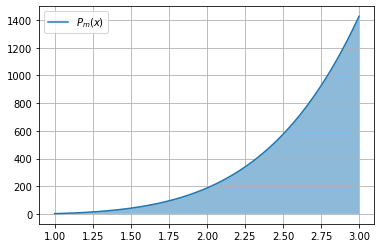

In [3]:
a, b = 1, 3
x_data = np.linspace(a, b, 1000)
plt.plot(x_data, Pm(x_data), label=f"$P_m(x)$")
plt.fill_between(x=x_data, y1=Pm(x_data), y2=0, alpha=0.5, linewidth=2)
plt.legend()
plt.grid()

Вычислим значение интеграла аналитически:
$$\int_1^3 (5.7 x^5 + 0.5 x^4 + 0.4 x^3 - 2.1 x - 2.5) dx = (0.95 x^6 + 0.1 x^5 + 0.1 x^4 - \frac{21}{20} x^2 - 2.5 x )\big|_1^3 = 710.4$$

**Метод левых прямоугольников**
$$S = h \sum_{i=0}^{N-1}f(x_i)$$
Значение остаточного члена для формулы левых прямоугольников:
$$R = \frac{M_1(b-a)}{2}h = M_1 h \qquad \text{где} \quad M_1 = \max_{x \in \left[a, b\right]}\left| f'(x)\right|$$

$$M_1 = M_1 = \max_{x \in \left[a, b\right]}\left|28.5 x^4 + 2 x^3 + 1.2 x^2 - 2.1\right| = 2371.2$$

Получаем: $$R = M_1 h < \varepsilon \quad \Rightarrow \quad h < \frac{\varepsilon}{2371.2}$$

In [4]:
I = 710.4

M1 = max(abs(28.5 * x_data ** 4 + 2 * x_data ** 3 + 1.2 * x_data ** 2 - 2.1))
eps = 0.05
h = eps / M1
print("M1 = ", M1)
print("h = ", h)
print(int((b - a) / h) + 1)

M1 =  2371.2000000000003
h =  2.1086369770580296e-05
94849


In [5]:
def I_left_rect(a, b, f, h):
    x_data = np.linspace(a, b, round((b - a) / h) + 1)
    return h * np.sum(f(x_data[:-1]))

In [6]:
start_time = time.time()
I_lrect = I_left_rect(a, b, Pm, h)
stop_time = time.time()
R_h = abs(I - I_lrect)
print("Значение интеграла по формуле левых прямоугольников: ", I_lrect)
print("Значение погрешности: ", R_h)
print("Время вычисления: ", stop_time - start_time)
print("Значение погрешности меньше эпсилон: ", "да" if R_h < eps else "нет")

Значение интеграла по формуле левых прямоугольников:  710.3849697223905
Значение погрешности:  0.01503027760952591
Время вычисления:  0.020923614501953125
Значение погрешности меньше эпсилон:  да


**Формула Милна:**
$$S = \frac{h}{90}\sum_{i=1}^n \left[ 7 f(x_{i-1}) + 32 f(x_{i-1} + \frac{h}{4}) + 12 f(x_{i-\frac{1}{2}}) + 32 f(x_{i} - \frac{h}{4}) + 7 f(x_i)\right]$$
Остаточный член:
$$R = \frac{M_6 (b-a)}{1935360} h^6$$
Так как многочлен 5 степени, а остаточный член содержит $M_6$, то $R = 0$, поэтому примем $h = b - a$, $n = 1$

In [7]:
def Milne(a, b, f, h):
    x_data = np.linspace(a, b, round((b - a) / h) + 1)
    s = 0
    for i in range(1, len(x_data)):
        s += 7 * f(x_data[i-1])
        s += 32 * f(x_data[i-1] + h / 4)
        s += 12 * f((x_data[i] + x_data[i-1]) / 2)
        s += 32 * f(x_data[i] - h / 4)
        s += 7 * f(x_data[i])
    s *= (h / 90)
    return s

In [8]:
h = b - a # берем весь отрезок
start_time = time.time()
I_Milne = Milne(a, b, Pm, h)
stop_time = time.time()
R_h = abs(I - I_Milne)
print("Значение интеграла по формуле Mилна: ", I_Milne)
print("Значение погрешности: ", R_h)
print("Время вычисления: ", stop_time - start_time)

Значение интеграла по формуле Mилна:  710.4
Значение погрешности:  0.0
Время вычисления:  0.0002498626708984375


**Квадратурная формула Гаусса**
$$\int_a^b f(x) dx \approx \frac{b-a}{2} \sum_{i=0}^{N} A_i f\left( \frac{a+b}{2} + \frac{b-a}{2} t_i \right)$$
Так как степень многочлена равна $5 = 2N+1 \quad \Rightarrow \quad N = 2 \quad \Rightarrow \quad N+1 = 3$ узла для вычисления интеграла без погрешности.

Значения весов и узлов квадратурной формулы Гаусса: \
$t_0 = -\sqrt{\frac{3}{5}}$ \
$A_0 = \frac{5}{9}$ \
$t_1 = 0$ \
$A_1 = \frac{8}{9}$ \
$t_2 = \sqrt{\frac{3}{5}}$ \
$A_2 = \frac{5}{9}$

In [9]:
def Gauss():
    t = [-np.sqrt(3/5), 0, np.sqrt(3/5)]
    A = [5/9, 8/9, 5/9]
    ab = (a + b) / 2
    ba = (b - a) / 2
    g = 0
    for i in range(3):
        x = ab + ba * t[i]
        g += A[i] * Pm(x)
    g *= ba
    return g

In [10]:
start_time = time.time()
I_Gauss = Gauss()
stop_time = time.time()
print("Значение интеграла по формуле Гаусса: ", I_Gauss)
print("Время вычисления: ", stop_time - start_time)

Значение интеграла по формуле Гаусса:  710.4000000000001
Время вычисления:  0.0002739429473876953


| Найденное точное значение интеграла<br>$I = 710.4$ | Число разбиений отрезка $n$<br>Шаг интегрирования $h$ | Значение интеграла, вычисленное по состваной формуле $I^h$<br>Величина погрешности интеграла, вычисленного по составной формуле $R^h$ |
|----------------------------------------------------|-------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| Метод левых прямоугольников                        | $n = 94849$<br>$h = 2.1*10^{-5}$                      | $I^h = 710.3849697223905$<br>$R^h = 0.01503027760952591$                                                                              |
| Формула Милна                                      | $n = 1$<br>$h = 2$                                    | $I^h = 710.4$<br>$R^h = 0$                                                                                                            |
| Метод Гаусса                                       | Число узлов квадратуры: 3                             | $I^G = 710.4000000000001$                                                                                                             |

## Задача 5.2
Вычислить интеграл $I = \int_a^b f(x) dx$ с точностью $\varepsilon = 10^{-12}$ \
$f(x) = 2 x \sin^2(3x)$ \
$\left[a, b\right] = \left[-5, 0\right]$

#### Порядок решения задачи
1. Вычислить интеграл с помощью средств пакета Python.
2. Составить программу, содержащую следующие разделы:
    - процедуру-функцию, вычисляющую интеграл по составной квадратурной формуле из индивидуального варианта $I^h$ с заданным шагом h.
    - подпрограмму, вычисляющую значение интеграла с заданной точностью , оценку погрешности производить на основе правила Рунге.
    - вычисление уточненного значение интеграла и величину погрешности
Результатом работы программы должны быть следующие величины:
    n - число разбиений отрезка интегрирования, при котором заданная точность достигнута
    $I^h$ и $I^{h/2}$ полученные значения интеграла при шагах $h$ и $\frac{h}{2}$ соответственно
    $R^h = \left| I^h - I \right|$ и $R^{h/2} = \left| I^{h/2} - I \right|$ - величины абсолютных погрешностей
    $I^{\text{уточн}}$ и $R^{\text{уточн}} = \left| I - I^{\text{уточн}} \right|$
3. Вычислить интеграл по программе и полученные данные свести в таблицу 5.2

In [11]:
def f(x):
    return 2 * x * np.sin(3 * x) ** 2

In [12]:
a, b = -5, 0
I, err = integrate.quad(f, a, b)
print("I = ", I)
print("abserr = ", err)

I =  -13.346852702024952
abserr =  1.4816144925178048e-13


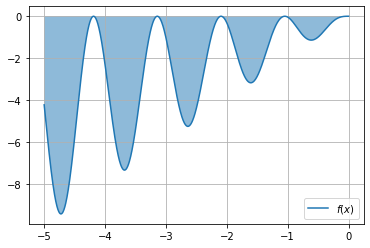

In [13]:
x_data = np.linspace(a, b, 1000)
plt.plot(x_data, f(x_data), label=f"$f(x)$")
plt.fill_between(x=x_data, y1=f(x_data), y2=0, alpha=0.5,linewidth=2)
plt.legend()
plt.grid()

Правило Рунге:
$$I - I^{h/2} \approx \frac{I^{h/2} - I^{h}}{2^{p}-1}$$
Уточнение по Рунге:
$$I \approx I^{h/2} + \frac{I^{h/2} - I^{h}}{2^{p}-1}$$

In [14]:
def I_RungeErr(a, b, f, eps, p, Ifunc):
    n = 2
    h = (b  - a) / n
    Ih = Ifunc(a, b, f, h)
    n *= 2
    h = (b - a) / n
    Ih2 = Ifunc(a, b, f, h)
    while(abs(Ih2 - Ih)/(2**p - 1) >= eps):
        n *= 2
        h = (b - a) / n
        Ih = Ih2
        Ih2 = Ifunc(a, b, f, h)
    return (Ih, Ih2, n) 

def Runge_clarify(Ih, Ih2, p):
    return Ih2 + (Ih2 - Ih) / (2**p - 1)

Для формулы Милна:

In [15]:
eps = 1e-12
Ih, Ih2, n = I_RungeErr(a, b, f, eps, 6, Milne)
I_clarified = Runge_clarify(Ih, Ih2, 6)
R_clarified = abs(I - I_clarified)
print("Ih = ", Ih)
print("Ih2 = ", Ih2)
print("n = ", n)
print("Rh = ", abs(I - Ih))
print("Rh2 = ", abs(I - Ih2))
print("I(уточн) =", I_clarified)
print("R(уточн) = ", R_clarified) 

Ih =  -13.346852701964416
Ih2 =  -13.346852702023988
n =  256
Rh =  6.053646472992114e-11
Rh2 =  9.64561763794336e-13
I(уточн) = -13.346852702024933
R(уточн) =  1.9539925233402755e-14


Для формулы левых прямоугольников:

In [16]:
eps = 1e-7
Ih, Ih2, n = I_RungeErr(a, b, f, eps, 2, I_left_rect)
I_clarified = Runge_clarify(Ih, Ih2, 2)
R_clarified = abs(I - I_clarified)
print("Ih = ", Ih)
print("Ih2 = ", Ih2)
print("n = ", n)
print("Rh = ", abs(I - Ih))
print("Rh2 = ", abs(I - Ih2))
print("I(уточн) =", I_clarified)
print("R(уточн) = ", R_clarified) 

Ih =  -13.34685301709078
Ih2 =  -13.346852859557847
n =  67108864
Rh =  3.1506582764961877e-07
Rh2 =  1.5753289517306257e-07
I(уточн) = -13.34685280704687
R(уточн) =  1.0502191827299612e-07


|            **$I = -13.346852702024952$**            	|      **Метод левых прямоугольников**     	|              **Метод Милна**              	|
|:---------------------------------------------------:	|:----------------------------------------:	|:-----------------------------------------:	|
|              Погрешность $\varepsilon$              	|            $1 \times 10^{-7}$            	|            $1 \times 10^{-12}$            	|
|             Число разбиений отрезка $n$             	|                   $256$                  	|                 $67108864$                	|
|                Значение интеграла $I$               	|        $I^h = -13.34685301709078$        	|        $I^h = -13.346852701964416$        	|
|                 Величина погрешности                	|       $R^h =  3.15 \times 10^{-7}$       	|       $R^h =  6.05 \times 10^{-11}$       	|
|            Уточненное значение интеграла            	|  $I^{\text{уточн}} = -13.34685280704687$ 	|  $I^{\text{уточн}} = -13.346852702024933$ 	|
| Величина погрешности уточненного значения интеграла 	| $R^{\text{уточн}} = 1.05 \times 10^{-7}$ 	| $R^{\text{уточн}} = 1.95 \times 10^{-14}$ 	|